In [16]:
import matplotlib.pyplot as plt

Text(0.5, 0.5, 'bar')

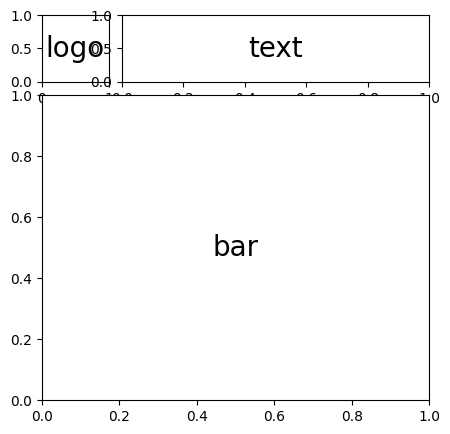

In [17]:
fig = plt.figure(figsize=(5, 5))

layout = [["logo"] + ["text"] * 4, ["bar"]*5, ["bar"]*5, ["bar"]*5, ["bar"]*5]

ax_dict = fig.subplot_mosaic(layout)

ax_dict["logo"].annotate(
    xy=(.5, .5),
    text="logo",
    ha="center",
    va="center",
    size=20
)

ax_dict["text"].annotate(
    xy=(.5, .5),
    text="text",
    ha="center",
    va="center",
    size=20
)

ax_dict["bar"].annotate(
    xy=(.5, .5),
    text="bar",
    ha="center",
    va="center",
    size=20
)


In [18]:
season = ["2005",
          "2006",
          "2007",
          "2008",
          "2009",
          "2010",
          "2011",
          "2012",
          "2013",
          "2014",
          "2015",
          "2016",
          "2017",
          "2018",
          "2019",
          "2020",
          "2021"]
points = [43, 42, 52, 50, 67, 71, 89, 78, 86, 79, 66, 78, 100, 98, 81, 86, 93]

In [19]:
import matplotlib.ticker as ticker
from PIL import Image
import urllib

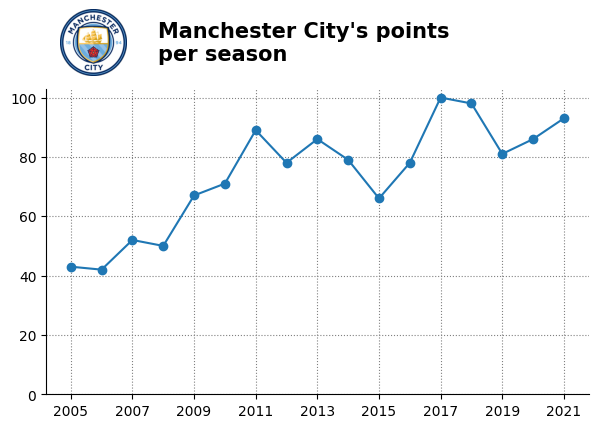

In [33]:
fig = plt.figure(figsize=(7, 5))

ax_dict = fig.subplot_mosaic(layout)

# add logo
fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{8456:.0f}.png"))
ax_dict["logo"].imshow(club_icon)
ax_dict["logo"].axis("off")
ax_dict["text"].axis("off")

# add title
ax_dict["text"].annotate(
    xy=(0, .5),
    text="Manchester City's points\nper season",
    ha="left",
    va="center",
    weight="bold",
    size=15
)

# add the bar chart
ax_dict["bar"].plot(season, points, marker="o")
ax_dict["bar"].xaxis.set_major_locator(ticker.MultipleLocator(2))

ax_dict["bar"].spines["top"].set_visible(False)
ax_dict["bar"].spines["right"].set_visible(False)
ax_dict["bar"].set_ylim(0)
ax_dict["bar"].grid(visible=True, ls=":", color="gray")


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.transforms import ScaledTranslation

from PIL import Image
import urllib
import os
import numpy as np


In [48]:
def ax_logo(team_id, ax):
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(
        f'{fotmob_url}{team_id:.0f}.png'))
    ax.imshow(club_icon)
    ax.axis('off')
    return ax


In [53]:
clubs = [
    4616,
    210173,
    8044,
    9991,
    9860,
    8003,
    8695,
    8654,
    9731,
    10154
]

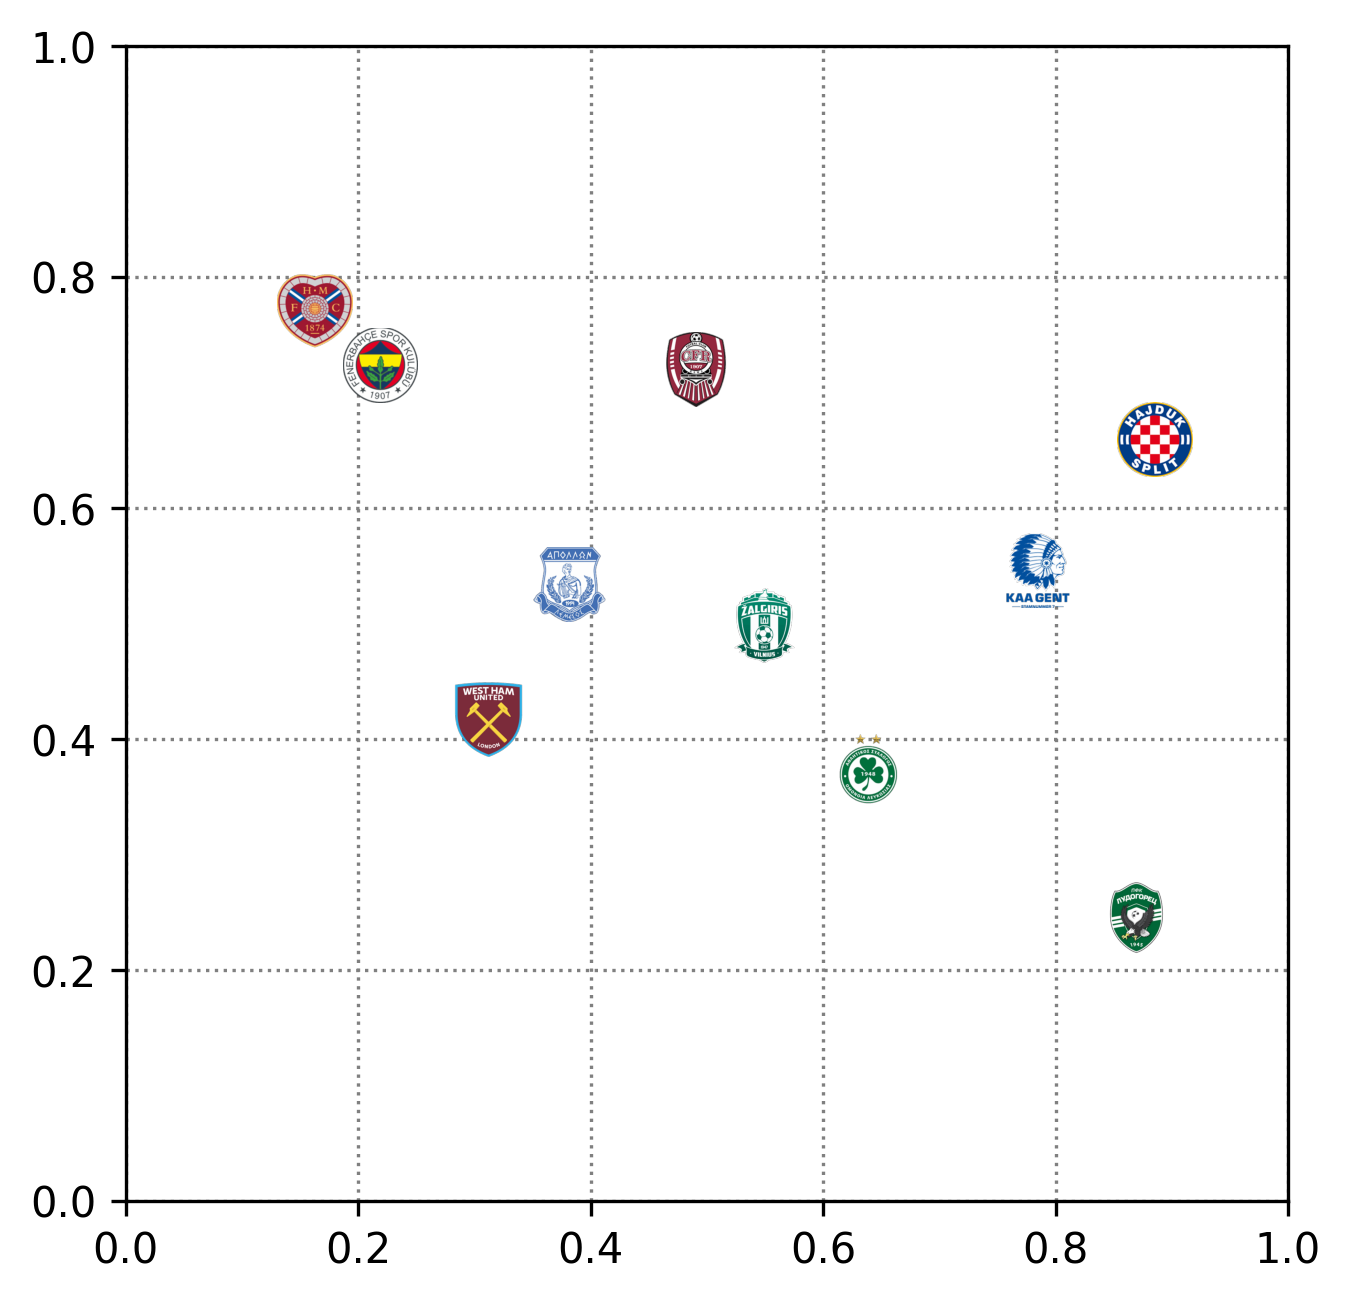

In [57]:
np.random.seed(1200)
x_loc = np.random.uniform(.1, .9, 10)
y_loc = np.random.uniform(.1, .9, 10)

fig = plt.figure(figsize=(5, 5), dpi=300)
ax = plt.subplot()

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
def DC_to_NFC(x): return FC_to_NFC(DC_to_FC(x))

ax_size = .05

counter = 0

for x, y in zip(x_loc, y_loc):
    ax_coords = DC_to_NFC((x, y))
    image_ax = fig.add_axes(
        [ax_coords[0]-ax_size/2, ax_coords[1]-ax_size/2, ax_size, ax_size], fc='None')
    ax_logo(clubs[counter], image_ax)
    counter += 1

ax.scatter(x_loc, y_loc, zorder=3)
ax.grid(visible=True, ls=":", color="gray")
